In [1]:
import pandas as pd
df = pd.read_csv("/Users/maheshshirsath/Downloads/Machine_learning/spotify_analysis_dataset.csv")

print("Dataset Loaded Successfully")
print(df.head())


Dataset Loaded Successfully
  track_id track_name     artist     album release_date  duration_ms  \
0  TRK1000     Song 0   Artist 7   Album 3   2010-01-01       240151   
1  TRK1001     Song 1   Artist 4   Album 5   2010-01-02       253767   
2  TRK1002     Song 2  Artist 13  Album 19   2010-01-03       244375   
3  TRK1003     Song 3  Artist 11   Album 7   2010-01-04       299262   
4  TRK1004     Song 4   Artist 8   Album 9   2010-01-05       256330   

   popularity  danceability  energy  loudness  speechiness  acousticness  \
0          70         0.037   0.349     -2.87        0.522         0.616   
1          58         0.610   0.726    -22.87        0.770         0.635   
2          85         0.503   0.897     -1.33        0.216         0.045   
3          27         0.051   0.887     -1.46        0.623         0.375   
4          65         0.279   0.780     -5.88        0.085         0.626   

   instrumentalness  liveness  valence   tempo  
0             0.931     0.947    

SVM Prediction: 1


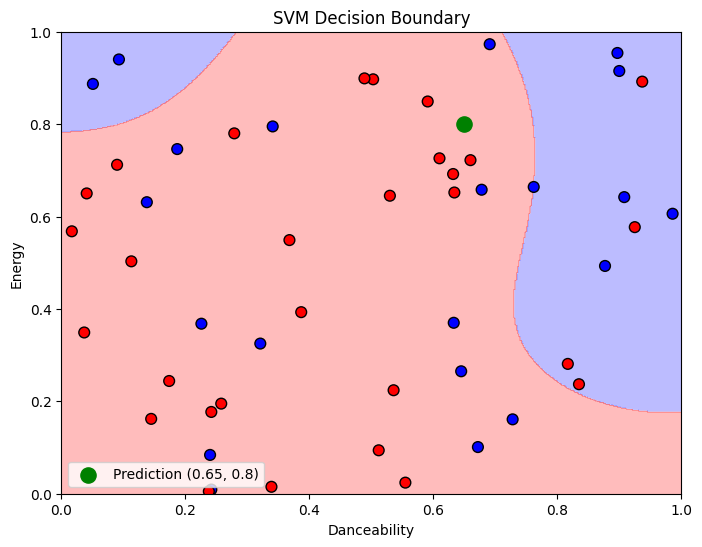

In [6]:
# Support Vector Machine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# -------------------------
# REQUIRED DEFINITIONS
# -------------------------
df['popular'] = (df['popularity'] >= 50).astype(int)

X_log = df[['danceability', 'energy']]
y_log = df['popular']

# -------------------------
# Train SVM
# -------------------------
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_log, y_log)

# -------------------------
# Prediction
# -------------------------
new_data = pd.DataFrame([[0.65, 0.8]], columns=['danceability', 'energy'])
prediction = svm.predict(new_data)
print("SVM Prediction:", prediction[0])

# -------------------------
# Decision Region Plot
# -------------------------
x_min, x_max = 0, 1
y_min, y_max = 0, 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

grid = pd.DataFrame(
    np.c_[xx.ravel(), yy.ravel()],
    columns=['danceability', 'energy']
)

Z = svm.predict(grid).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(
    X_log['danceability'],
    X_log['energy'],
    c=y_log,
    edgecolor='k',
    cmap='bwr',
    s=60
)

plt.scatter(
    new_data['danceability'],
    new_data['energy'],
    color='green',
    s=120,
    label='Prediction (0.65, 0.8)'
)

plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()
